In [1]:
import stockinator as st
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

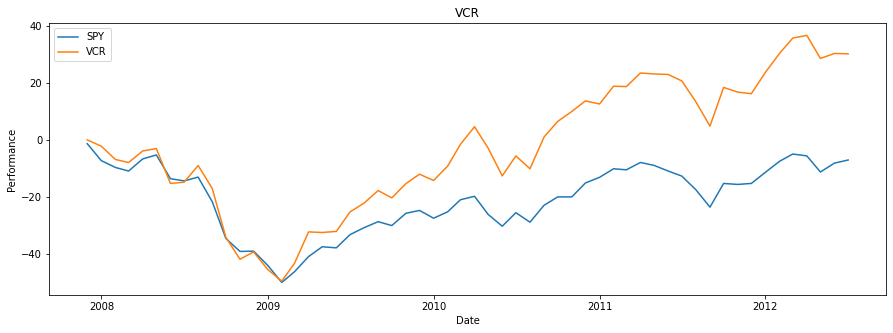

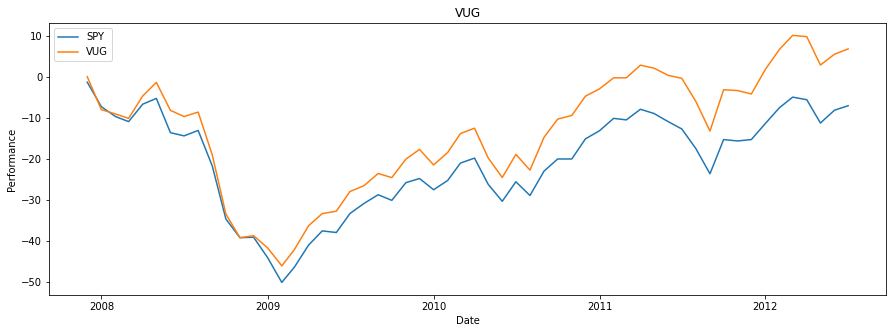

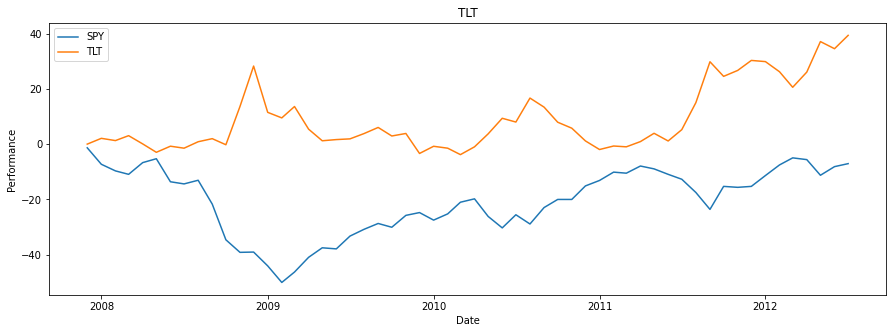

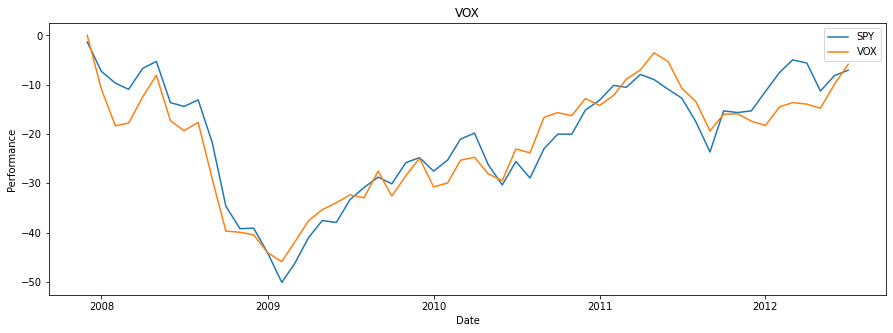

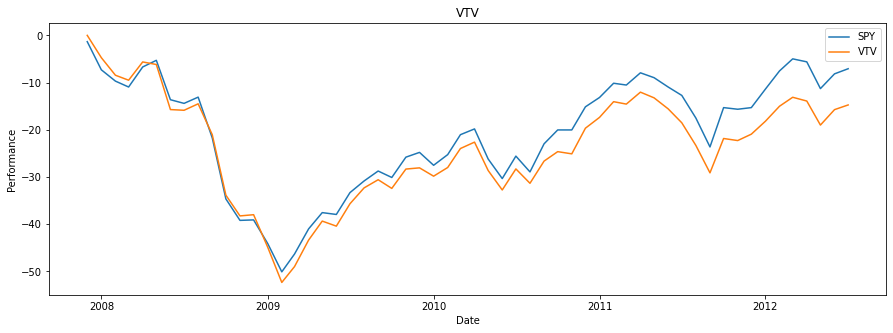

Skipping


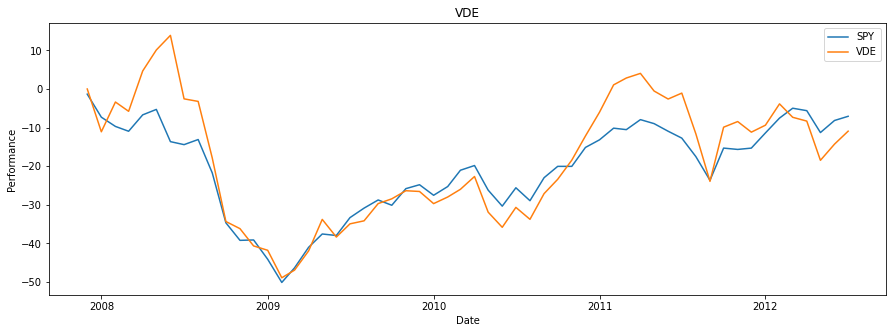

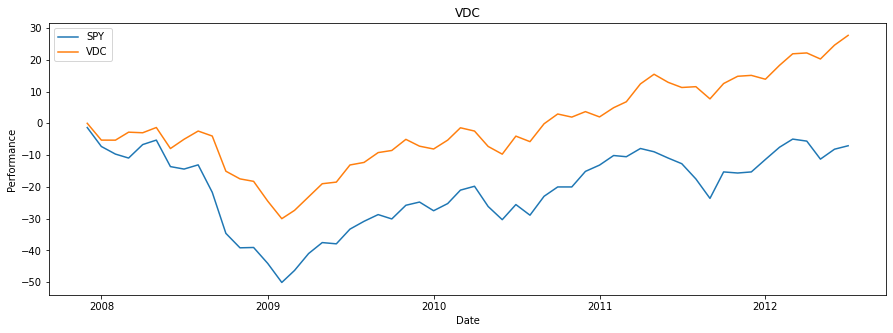

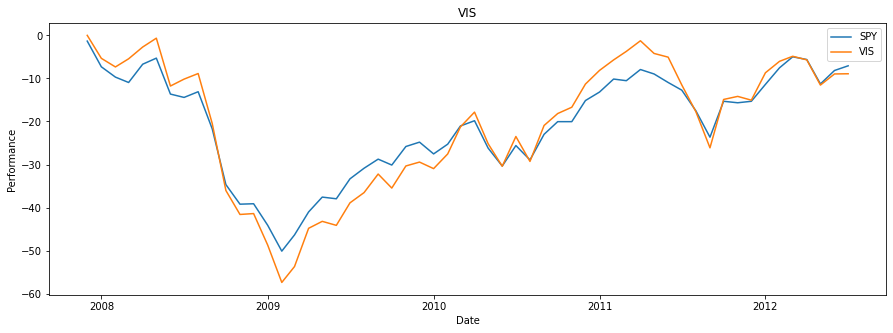

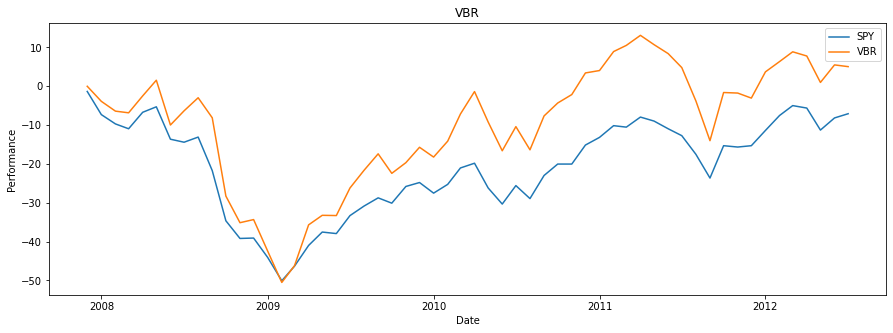

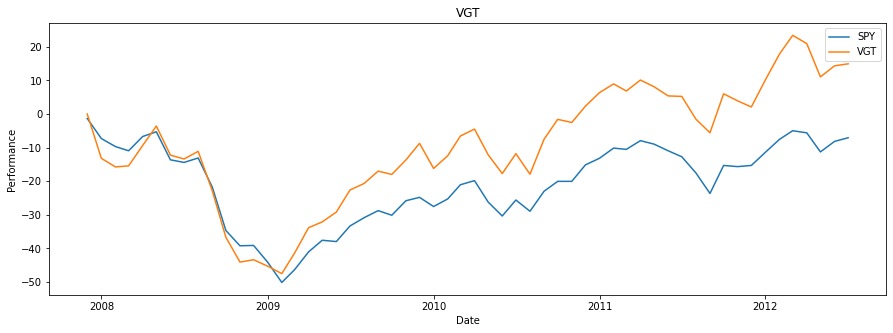

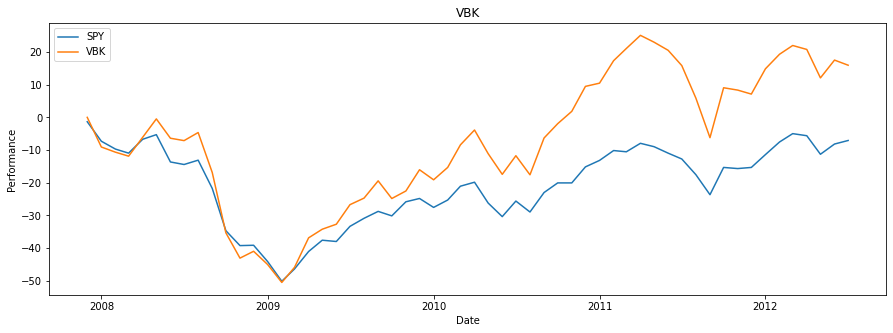

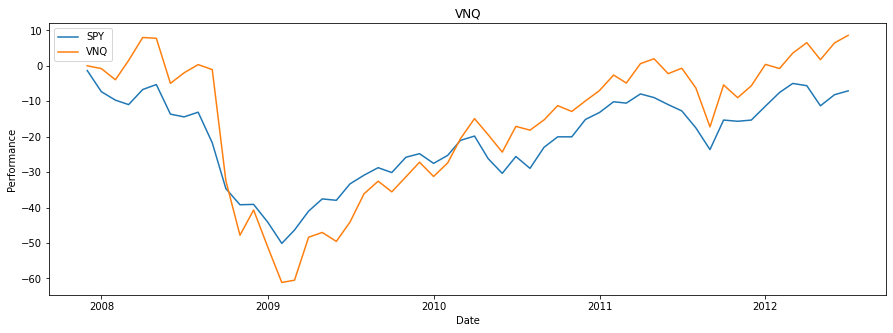

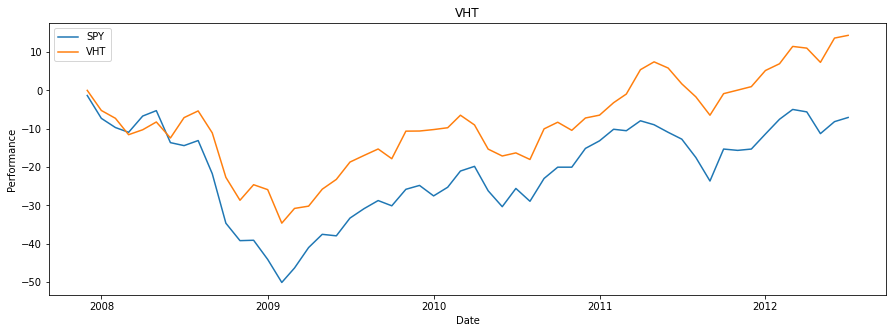

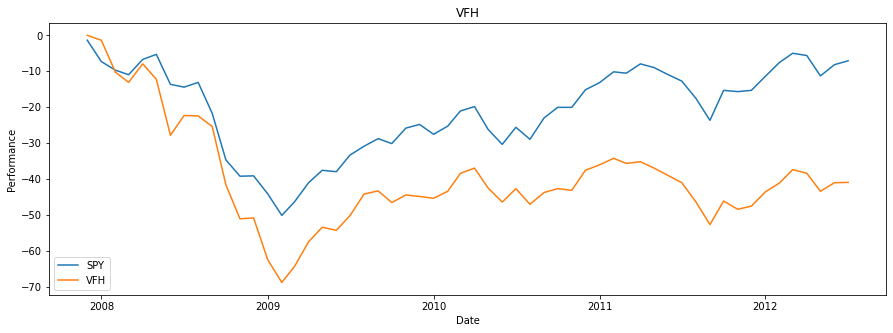

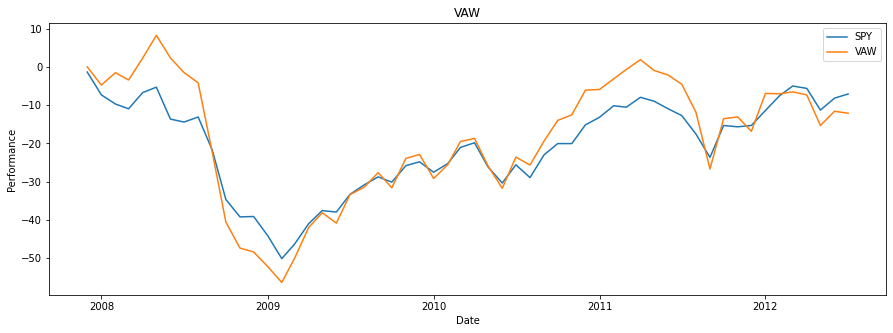

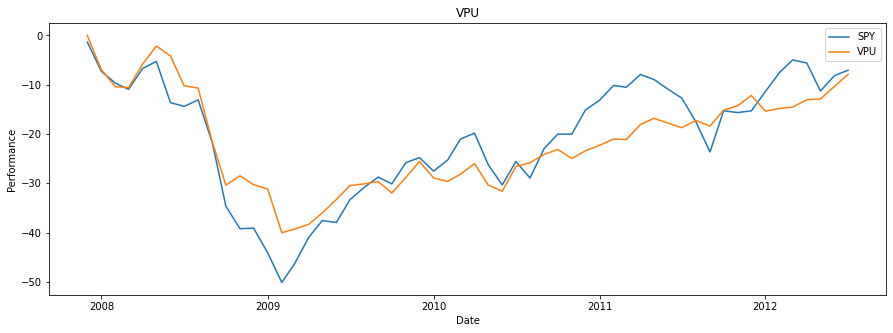

In [2]:
df = pd.read_pickle('stocks/sectors_1mo.pkl')
df = df.loc['2007-12-01':'2012-07-01']
#df = df.loc['2018-12-01':'2020-05-01']
df = df.dropna(how='all')

tickers = st.unique_list([c[0] for c in df.columns])

df, data = st.reset_index(df)
df.loc[:, ('SPY', 'Performance')] = \
    ((df['SPY']['Close'] - df['SPY']['Open'][0]) / df['SPY']['Open'][0]) * 100
    
for ticker in tickers:
    if ticker == 'SPY':
        print("Skipping")
        continue
        
    #data.loc[:, (ticker, 'Change')] = data[ticker]['Close'] - data[ticker]['Open']
    #df.loc[:, (ticker, 'PctChange')] = \
    #    ((df[ticker]['Close'] - df[ticker]['Open']) / df[ticker]['Open']) * 100
    df, data = st.reset_index(df)
    df.loc[:, (ticker, 'Performance')] = \
        ((df[ticker]['Close'] - df[ticker]['Close'][0]) / df[ticker]['Close'][0]) * 100
    
    #df.loc[:, (ticker, 'Outperform')] = \
    #    df[ticker]['Performance'].gt(df['SPY']['Performance'])
    plt.figure(figsize=(15,5))
    plt.xlabel("Date")
    plt.ylabel("Performance")
    plt.title(ticker)
    plt.plot(df.index, df['SPY']['Performance'], label='SPY') 
    plt.plot(df.index, df[ticker]['Performance'], label=ticker) 
    plt.legend()
    plt.show()
    
#display(df.loc[:, pd.IndexSlice[:, ['Performance', 'Outperform']]])
#dfp = df.loc[:, pd.IndexSlice[:, 'Performance']]
#display(dfp.describe())
#display(dfp.tail(20))

#df.plot(figsize=(20,16), kind='line')
